# 1. tensorflow v2.1xx에서 v1사용하기

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # v2 비활성화하고 v1을 활성화

## Tensorflow
- 그래프 정의 (tensor객체의 흐름)
- sess = tf.Session()을 실행
- sess.run()을 통해 변수값을 확인할 수 있음

In [6]:
# tensor = data(상수, 변수)와 연산
node1 = tf.constant('Hello, Tensorflow')
sess = tf.Session()
print(sess.run(node1))
print(sess.run(node1).decode())

b'Hello, Tensorflow'
Hello, Tensorflow


In [8]:
# 간단한 수학 연산 tensor 그래프
node1 = tf.constant(10, dtype=tf.float16)
node2 = tf.constant(20, dtype=tf.float16)
node3 = tf.add(node1, node2)

sess = tf.Session()
print(sess.run([node1,node2]))
print(sess.run(node3))

[10.0, 20.0]
30.0


In [10]:
# 타입변경
import numpy as np
node1 = tf.constant(np.array([1,2,3]), dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)
sess = tf.Session()
sess.run([node1, node2])

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float32)]

In [13]:
# 평균값 계산
data = np.array([1.,2.,3.,4.])
m = tf.reduce_mean(data)
sess = tf.Session()
sess.run(m)

2.5

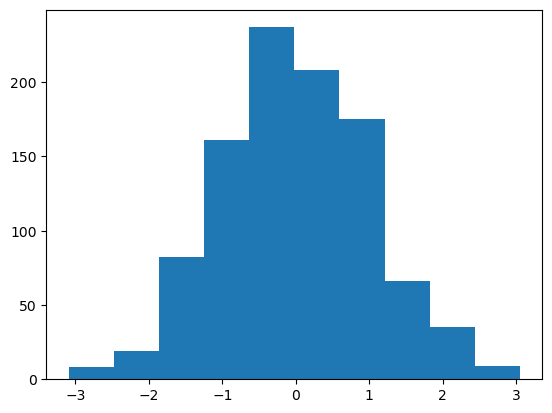

In [22]:
#tensor = tf.random_normal([size]) 평균 0, 표준편차가 1인 난수 size개 발생. 난수갯수 : 독립변수갯수
import matplotlib.pyplot as plt
tensor = tf.random_normal([1000]) # 평균 0, 표준편차가 1인 난수 2 (정규분포)
sess = tf.Session()
plt.hist(sess.run(tensor))
plt.show()

# 2. tensorflow v1을 이용한 linear regression을 구현
## 2.1 독립변수 x가 1개, 종속변수 y가 1개

In [30]:
# tensor 그래프(객체 흐름) 정의
# data set(x, y)
x = np.array([1,2,3])
y = np.array([1,2,3])

# weight와 bias(처음에는 랜덤값으로 셋팅했다가, 학습과정에서 변경)
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# Hypothesis : 결과는 넘파이 배열
H = W*x+b

# cost function (손실함수 = mse : 최소제곱법)
cost = tf.reduce_mean(tf.square(H - y))

"""
학습 목적 : cost가 최소가 되는 w, b를 찾는 것
cost 함수는 2차함수이므로 곡선 그래프. 곡선위 미분값이 줄어드는 방향으로 학습
"""
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Session 생성
sess = tf.Session()
# 변수노드(W,b) 초기화
sess.run(tf.global_variables_initializer())

# 6000번 학습 (v2에서의 fit함수)
for step in range(6001):
    _, cost_val, W_val, b_val= sess.run([train, cost, W, b])
    if step % 500 == 0:
        print('{}번째 cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0번째 cost:19.691890716552734, W:[-0.5879855], b:[-1.0679374]
500번째 cost:0.0012380582047626376, W:[1.0408666], b:[-0.09289886]
1000번째 cost:0.00011155228276038542, W:[1.0122669], b:[-0.02788559]
1500번째 cost:1.0050726814370137e-05, W:[1.0036821], b:[-0.00837024]
2000번째 cost:9.062616754818009e-07, W:[1.0011058], b:[-0.00251338]
2500번째 cost:8.20522458866435e-08, W:[1.0003327], b:[-0.00075638]
3000번째 cost:7.523488498861752e-09, W:[1.0001011], b:[-0.00022884]
3500번째 cost:6.752949310850909e-10, W:[1.00003], b:[-6.866427e-05]
4000번째 cost:7.587027534006197e-11, W:[1.0000104], b:[-2.2935026e-05]
4500번째 cost:2.0795401858841878e-11, W:[1.0000056], b:[-1.1722414e-05]
5000번째 cost:1.3684900435073644e-11, W:[1.0000045], b:[-9.127611e-06]
5500번째 cost:1.332346472732171e-11, W:[1.0000044], b:[-8.861256e-06]
6000번째 cost:1.332346472732171e-11, W:[1.0000044], b:[-8.861246e-06]


In [31]:
# 최종적으로 나온 회귀식 H = W*x + b
sess.run([W, b])

[array([1.0000044], dtype=float32), array([-8.861246e-06], dtype=float32)]

In [32]:
W_, b_ = sess.run([W, b])
W_, b_

(array([1.0000044], dtype=float32), array([-8.861246e-06], dtype=float32))

In [33]:
print('최종회귀식 : H = {}*x + {}'.format(W_[0],b_[0]))

최종회귀식 : H = 1.0000044107437134*x + -8.861245987645816e-06


In [34]:
def to_predict(x):
    return W_[0]*x+b_[0]

In [35]:
to_predict(3)

3.0000043709851525

## 2.2 predict을 하기 위한 placeholder 이용
- placeholder : 외부에서 데이터를 입력받을 수 있는 노드

In [38]:
a = tf.placeholder(tf.float16)
b = tf.placeholder(tf.float16)
ab = tf.add(a, b)
sess = tf.Session()
sess.run([a,b,ab], feed_dict={a : 10, b : 20})

[array(10., dtype=float16), array(20., dtype=float16), 30.0]

In [39]:
sess.run(ab, feed_dict={a:np.array([1,2,3]), b:np.array([1,2,3])})

array([2., 4., 6.], dtype=float16)

In [52]:
# data set
x_data = np.array([1,2,3,5,8])
y_data = np.array([3,5,7,11,17])

# placeholder 설정(x, y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# weight & bias
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# Hypothesis : 결과는 넘파이 배열
H = W*x+b

#cost function == loss function
cost = tf.reduce_mean(tf.square(H-y))

# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# sess
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(10001):
    _, cost_, W_, b_ = sess.run([train, cost, W, b], feed_dict={x : x_data, y : y_data})
    if (step+1)%1000==0:
        print('{}/10000 cost:{}, W:{}, b:{}'.format(step+1, cost_, W_, b_))

1000/10000 cost:2.6996499400411267e-06, W:[1.9994379], b:[1.0030042]
2000/10000 cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
3000/10000 cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
4000/10000 cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
5000/10000 cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
6000/10000 cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
7000/10000 cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
8000/10000 cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
9000/10000 cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
10000/10000 cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]


In [55]:
# 최종 W, b
sess.run([W, b])

[array([1.9999979], dtype=float32), array([1.000011], dtype=float32)]

In [56]:
# 예측하기
sess.run(H, feed_dict={x:5})

array([11.], dtype=float32)

In [57]:
sess.run(H, feed_dict={x:np.array([5,6,7,8,9])})

array([11.      , 12.999998, 14.999996, 16.999994, 18.999992],
      dtype=float32)

## 2.3 scale이 다른 데이터들의 linear regression 구현(scale 조정 X)

In [68]:
x_data = np.array([1,2,5,8,10])
y_data = np.array([5,15,68,80,95])
# placeholder 설정(x, y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# weight & bias
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hypothesis : 결과는 넘파이 배열
H = W*x+b
#cost function == loss function
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.0001).minimize(cost)
# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], feed_dict={x:x_data, y:y_data})
    if step%300==0:
        print('{}/6000 cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0/6000 cost:4507.08203125, W:[-0.47143444], b:[-0.61517566]
300/6000 cost:117.41105651855469, W:[9.05135], b:[0.652318]
600/6000 cost:79.76612854003906, W:[9.935285], b:[0.7534046]
900/6000 cost:79.43289947509766, W:[10.019286], b:[0.74678016]
1200/6000 cost:79.41993713378906, W:[10.029186], b:[0.730465]
1500/6000 cost:79.41006469726562, W:[10.032193], b:[0.7135306]
1800/6000 cost:79.40058135986328, W:[10.034483], b:[0.69681937]
2100/6000 cost:79.39140319824219, W:[10.036758], b:[0.68038857]
2400/6000 cost:79.38258361816406, W:[10.038922], b:[0.66424346]
2700/6000 cost:79.3740463256836, W:[10.041047], b:[0.64838934]
3000/6000 cost:79.36580657958984, W:[10.043134], b:[0.6328209]
3300/6000 cost:79.35784912109375, W:[10.045182], b:[0.6175329]
3600/6000 cost:79.35022735595703, W:[10.047196], b:[0.6025203]
3900/6000 cost:79.34281158447266, W:[10.049199], b:[0.58777446]
4200/6000 cost:79.335693359375, W:[10.051202], b:[0.57328117]
4500/6000 cost:79.32877349853516, W:[10.053145], b:[0.5590306

In [66]:
# 예측
sess.run(H, feed_dict={x:1})

array([11.258972], dtype=float32)

In [ ]:
# cost값이 멈춤 : local 최소값

## 2.4 scale이 다른 데이터들의 linear regression 구현(scale 조정 O)
### scale을 맞추는 방법
- normalization (정규화) : 데이터의 최대값을 1, 최소값을 0으로 조정
                              X - Xmin
        normalization = ────────────
                             Xmax - Xmin
    * 위의 식을 써도 되지만 라이브러리를 주로 씀 (sklearn.preprocessing.MinMaxScaler이용)
- standardization (표준화) : 데이터의 평균을 0, 표준편차를 1로 조정
                              X - Xmean(평균)
        standardization = ────────────
                               Xstd(표준편자)
    * 위의 식을 써도 되지만 라이브러리를 주로 씀 (sklearn.preprocessing.StandardScaler이용)

In [8]:
# 라이브러리를 사용하지 않고 정규화 : 예측할 경우 x데이터를 스케일 변환, 스케일된 예측값을 변환이 번거러움
x_data = np.array([1,2,5,8,10])
y_data = np.array([5,15,68,80,95])
scaled_x_data = (x_data - x_data.min())/(x_data.max() - x_data.min())
scaled_y_data = (y_data - y_data.min())/(y_data.max() - y_data.min())
print(scaled_x_data)
print(scaled_y_data)
0.7*(y_data.max() - y_data.min())+y_data.min()

[0.         0.11111111 0.44444444 0.77777778 1.        ]
[0.         0.11111111 0.7        0.83333333 1.        ]


68.0

In [19]:

x_data = np.array([1,2,5,8,10]).reshape(-1,1)
y_data = np.array([5,15,68,80,95]).reshape(-1,1)

from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler()# x_data를 표준화 시킬 객체
scalerY = MinMaxScaler()
scalerX.fit(x_data)
scalerY.fit(y_data)
scaled_x_data = scalerX.transform(x_data)
scaled_y_data = scalerY.transform(y_data)
scaled_x_data, scaled_y_data
np.column_stack([x_data, scaled_x_data, y_data, scaled_y_data])

array([[ 1.        ,  0.        ,  5.        ,  0.        ],
       [ 2.        ,  0.11111111, 15.        ,  0.11111111],
       [ 5.        ,  0.44444444, 68.        ,  0.7       ],
       [ 8.        ,  0.77777778, 80.        ,  0.83333333],
       [10.        ,  1.        , 95.        ,  1.        ]])

In [25]:
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# weight & bias
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hypothesis : 결과는 넘파이 배열
H = W*x+b
#cost function == loss function
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(12001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], feed_dict={x:scaled_x_data, y:scaled_y_data})
    if step%300==0:
        print('{}/12000 cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0/12000 cost:1.2239142656326294, W:[-0.27690133], b:[1.6437354]
300/12000 cost:0.5487234592437744, W:[-0.36159012], b:[1.2108879]
600/12000 cost:0.36282962560653687, W:[-0.34992144], b:[0.97886777]
900/12000 cost:0.2909197211265564, W:[-0.29617473], b:[0.84366643]
1200/12000 cost:0.24846026301383972, W:[-0.22578397], b:[0.755973]
1500/12000 cost:0.21602852642536163, W:[-0.15055804], b:[0.69235045]
1800/12000 cost:0.18883156776428223, W:[-0.07587633], b:[0.64160687]
2100/12000 cost:0.16540716588497162, W:[-0.00409201], b:[0.5983483]
2400/12000 cost:0.14508889615535736, W:[0.06386038], b:[0.55993026]
2700/12000 cost:0.12743249535560608, W:[0.12770508], b:[0.5250133]
3000/12000 cost:0.11208202689886093, W:[0.18746644], b:[0.49288303]
3300/12000 cost:0.09873463958501816, W:[0.24330093], b:[0.46312463]
3600/12000 cost:0.0871286392211914, W:[0.2954169], b:[0.43547118]
3900/12000 cost:0.07703675329685211, W:[0.34403867], b:[0.4097301]
4200/12000 cost:0.06826139986515045, W:[0.38938951], b:[0.

In [36]:
scaled_input = scalerX.transform(np.array([[3]]))
sess.run(H, feed_dict={x:scaled_input})
scaied_output = scalerY.inverse_transform(sess.run(H, feed_dict={x:scaled_input}))
scaied_output

array([[33.05112]], dtype=float32)

In [43]:
scaled_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scalerY.inverse_transform(scaled_y_hat)
np.column_stack([y_data,y_hat])

array([[ 5.        , 14.7670784 ],
       [15.        , 23.90909767],
       [68.        , 51.33516312],
       [80.        , 78.76122284],
       [95.        , 97.0452652 ]])

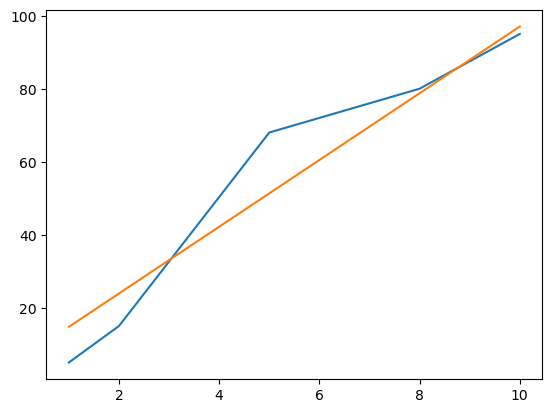

In [46]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data)
plt.plot(x_data,y_hat)
plt.show()

In [52]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame({'x':x_data[:,0], 'y':y_data[:,0]})
df

,x,y
0,1,5
1,2,15
2,5,68
3,8,80
4,10,95


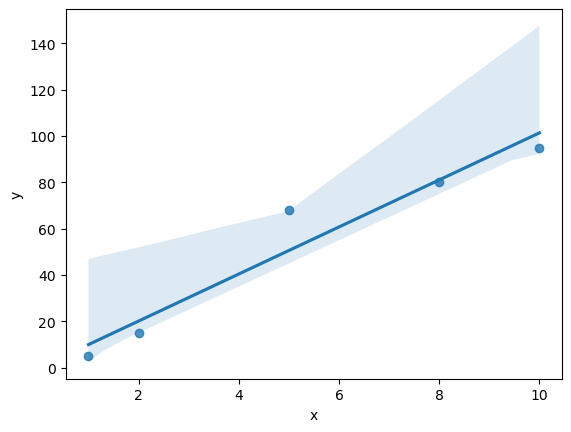

In [51]:
sns.regplot(data=df, x=df.x, y=df.y)
plt.show()

In [54]:
# 라이브러리를 쓰지 않고 표준화
x_data = np.array([1,2,5,8,10])
y_data = np.array([5,15,68,80,95])
scaled_x_data = (x_data - x_data.mean())/x_data.std()
scaled_Y_data = (y_data - y_data.mean())/y_data.std()
scaled_Y_data

array([-1.32373476, -1.04563922,  0.42826713,  0.76198177,  1.17912508])

In [65]:
# 라이브러리를 사용해서 표준화
x_data = np.array([1,2,5,8,10]).reshape(-1,1)
y_data = np.array([5,15,68,80,95]).reshape(-1,1)

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()
scaler_x.fit(x_data)
scaler_y.fit(y_data)
scaled_x_data = scaler_x.transform(x_data)
scaled_y_data = scaler_y.transform(y_data)
print(np.column_stack([x_data, scaled_x_data,]))
print(np.column_stack([y_data, scaled_y_data]))

[[ 1.         -1.22474487]
 [ 2.         -0.93313895]
 [ 5.         -0.05832118]
 [ 8.          0.81649658]
 [10.          1.39970842]]
[[ 5.         -1.32373476]
 [15.         -1.04563922]
 [68.          0.42826713]
 [80.          0.76198177]
 [95.          1.17912508]]


In [67]:
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# weight & bias
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hypothesis : 결과는 넘파이 배열
H = W*x+b
#cost function == loss function
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(12001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], feed_dict={x:scaled_x_data, y:scaled_y_data})
    if step%3000==0:
        print('{}/12000 cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0/12000 cost:5.68877649307251, W:[-1.3160664], b:[0.63752097]
3000/12000 cost:0.06123834848403931, W:[0.9632849], b:[0.00157079]
6000/12000 cost:0.06120416522026062, W:[0.9688999], b:[3.8729386e-06]
9000/12000 cost:0.06120417267084122, W:[0.9688999], b:[2.9096967e-08]
12000/12000 cost:0.061204176396131516, W:[0.9688999], b:[2.420974e-08]


## 2.5 독립변수 x가 여러개인 linear Regression

## 2.6 csv를 array로 읽어오기

In [77]:
# 방법 1 : csv -> 데이터프레임 -> 넘파이배열
# 1. CSV를 데이터 프레임으로 읽음
data = pd.read_csv('data/ozone.csv')
# 2. 결측치 대체 or 삭제
# data.fillna(value=data.mean(), inplace=True)
data.dropna(how='any', axis=0, inplace=True)
X = data[['Ozone','Solar.R','Wind','Temp']].values
y = data['Ozone'].values
X.shape, y.shape

((111, 4), (111,))

In [82]:
# 방법2 : csv -> 넘파이배열
# data = np.loadtxt('data/ozone_nonan.csv', delimiter=',', skiprows=1) # NAN과 header 없어야함
data = np.genfromtxt('data/ozone_nonan.csv', delimiter=',', skip_header=1, missing_values='NA', filling_values=np.nan)
data

array([[ 41. , 190. ,   7.4,  67. ,   5. ,   1. ],
       [ 36. , 118. ,   8. ,  72. ,   5. ,   2. ],
       [ 12. , 149. ,  12.6,  74. ,   5. ,   3. ],
       [ 18. , 313. ,  11.5,  62. ,   5. ,   4. ],
       [  nan,   nan,  14.3,  56. ,   5. ,   5. ],
       [ 28. ,   nan,  14.9,  66. ,   5. ,   6. ],
       [ 23. , 299. ,   8.6,  65. ,   5. ,   7. ],
       [ 19. ,  99. ,  13.8,  59. ,   5. ,   8. ],
       [  8. ,  19. ,  20.1,  61. ,   5. ,   9. ],
       [  nan, 194. ,   8.6,  69. ,   5. ,  10. ],
       [  7. ,   nan,   6.9,  74. ,   5. ,  11. ],
       [ 16. , 256. ,   9.7,  69. ,   5. ,  12. ],
       [ 11. , 290. ,   9.2,  66. ,   5. ,  13. ],
       [ 14. , 274. ,  10.9,  68. ,   5. ,  14. ],
       [ 18. ,  65. ,  13.2,  58. ,   5. ,  15. ],
       [ 14. , 334. ,  11.5,  64. ,   5. ,  16. ],
       [ 34. , 307. ,  12. ,  66. ,   5. ,  17. ],
       [  6. ,  78. ,  18.4,  57. ,   5. ,  18. ],
       [ 30. , 322. ,  11.5,  68. ,   5. ,  19. ],
       [ 11. ,  44. ,   9.7,  6